In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def load_df(pit_name):
    file = 'data/{}.csv'.format(pit_name)
    pit_df = pd.read_csv(file, encoding='utf-8')
    pit_df['count'] = pit_df['strikes'].map(str) + '-' + pit_df['balls'].map(str)
    pit_df['event_cat'] = pit_df['events'].map(lambda x: event_category[x] if x in event_category.keys() else None)
    return pit_df

# focus hitted balls
def hit_events(pit_df, cols=['game_date', 'at_bat_number', 'pitch_type', 'release_speed', 'iso_value', 'strikes', 'balls', 'events', 'pitch_number', 'stand']):
    
    pit_focus = pit_df[cols].copy()
    pit_focus = pit_focus[pit_focus['events'].isna() != True].copy()
    pit_focus['count'] = pit_df['strikes'].map(str) + '-' + pit_df['balls'].map(str)
    return pit_focus

def view_as_group(df, viewpoint):
    view_dict = {}
    for view, table in list(df.groupby(viewpoint)):
        view_dict[view] = table
    return view_dict

focus_col = ['pitch_type', 'release_speed', 'iso_value', 'strikes', 'balls', 'events', 'event_cat', 'pitch_number', 'stand', 'inning', 'count']

event_category = {
    "double":"extra_bh",
    "triple":"extra_bh",
    "home_run":"extra_bh",
    "catcher_interf":"def_err",
    "field_error":"def_err",
    "strikeout":"so",
    "strikeout_double_play":"so",
    "walk":"BBs",
    "hit_by_pitch":"BBs",
    "caught_stealing_2b":"cs",
    "double_play":"dp",
    "field_out":"out",
    "fielders_choice_out":"out",
    "force_out":"out",
    "grounded_into_double_play":"dp",
    "sac_bunt":"out",
    "sac_fly":"out",
    "single":"hit",
}

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

In [23]:
ml_df = load_df('nova')
ml_focus = hit_events(ml_df)

In [24]:
ml_focus_ = ml_focus.set_index(['game_date', 'at_bat_number']).sort_index(ascending=True)
ml_df_ = ml_df.set_index(['game_date', 'at_bat_number']).sort_index(ascending=True)

In [25]:
ml_df_['pitch_type'].value_counts()

FT    1011
FF     607
CU     501
CH     280
FS       1
Name: pitch_type, dtype: int64

In [29]:
atl_df = ml_df_['2018-08':][focus_col]
bal_df = ml_df_[:'2018-08'][focus_col]

In [57]:
print(atl_df['pitch_type'].value_counts())
print(bal_df['pitch_type'].value_counts())

FF    416
FS    240
SL     80
FT      2
Name: pitch_type, dtype: int64
FF    1227
FS     510
SL     338
Name: pitch_type, dtype: int64


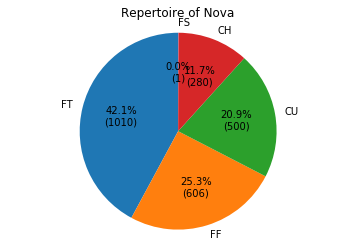

In [26]:
fig1, ax1 = plt.subplots()
labels = ml_df['pitch_type'].value_counts().index
values = ml_df['pitch_type'].value_counts().values
ax1.pie(values, labels= labels, startangle=90, autopct=lambda pct: func(pct, values))
ax1.axis('equal')
plt.title('Repertoire of Nova')
plt.show()

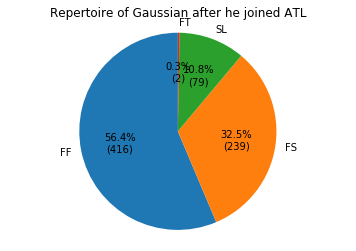

In [109]:
fig1, ax1 = plt.subplots()
labels = atl_df['pitch_type'].value_counts().index
values = atl_df['pitch_type'].value_counts().values
ax1.pie(values, labels=labels, startangle=90, autopct=lambda pct: func(pct, values))
ax1.axis('equal')
plt.title('Repertoire of Gaussian after he joined ATL')
plt.show()

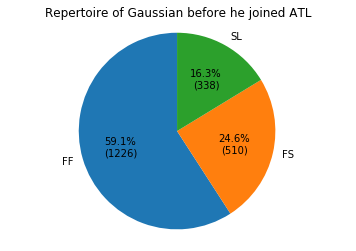

In [107]:
fig1, ax1 = plt.subplots()
labels = bal_df['pitch_type'].value_counts().index
values = bal_df['pitch_type'].value_counts().values
ax1.pie(values, labels= labels, startangle=90, autopct=lambda pct: func(pct, values))
ax1.axis('equal')
plt.title('Repertoire of Gaussian before he joined ATL')
plt.show()

In [27]:
ml_df.pivot_table(index='pitch_type', values='release_speed', aggfunc=[np.mean, 'count'])

,mean,count
,release_speed,release_speed
pitch_type,,
CH,86.467143,280
CU,80.543513,501
FF,93.064086,607
FS,86.600000,1
FT,92.766469,1011


In [28]:
ml_event = view_as_group(ml_df, 'events')
ml_cat = view_as_group(ml_df, 'event_cat')
ml_so = len(ml_cat['so'])
ml_bb = len(ml_cat['BBs'])
ml_sbr = ml_so/ml_bb

In [29]:
ml_sbr

3.40625

In [105]:
atl_df.pivot_table(index='pitch_type', values='release_speed', aggfunc=[np.mean, 'count'])

,mean,count
,release_speed,release_speed
pitch_type,,
FF,93.56274,416
FS,81.99500,240
FT,94.55000,2
SL,81.62125,80


In [31]:
atl_event = view_as_group(atl_df, 'events')
bal_event = view_as_group(bal_df, 'events')

In [39]:
atl_cat = view_as_group(atl_df, 'event_cat')
bal_cat = view_as_group(ml_df, 'event_cat')

In [41]:
at_so = len(atl_cat['so'])
at_bb = len(atl_cat['BBs'])
ba_so = len(bal_cat['so'])
ba_bb = len(bal_cat['BBs'])

In [48]:
at_sbr = at_so/at_bb
ba_sbr = ba_so/ba_bb
print("In BAL: {:.3f}, In ATL: {:.3f}".format(ba_sbr, at_sbr))

In BAL: 2.811, In ATL: 2.214


In [53]:
atl_cat['so']['pitch_type'].value_counts()

FS    19
FF    11
SL     1
Name: pitch_type, dtype: int64

In [12]:
ml_cat['so']['pitch_type'].value_counts()

NameError: name 'ml_cat' is not defined

In [5]:
ml_by_event = view_as_group(ml_df_, 'events')

In [6]:
ev_list = [ev for ev in ml_by_event]

In [7]:
#hr_log = ml_by_event['home_run'].loc[:, focus_col]
double_log = ml_by_event['double'].loc[:, focus_col]
#triple_log = ml_by_event['triple'].loc[:, focus_col]

In [8]:
so_log = ml_by_event['strikeout'].loc[:, focus_col].sort_index()
#so_log = so_log.append(ml_by_event['strikeout_double_play'].loc[:, focus_col]).sort_index()
bb_log = ml_by_event['walk'].loc[:, focus_col]

In [9]:
so_log['pitch_type'].value_counts()

FS    68
FF    54
SL    12
Name: pitch_type, dtype: int64

In [10]:
ml_cat = view_as_group(ml_df_[focus_col], 'event_cat')

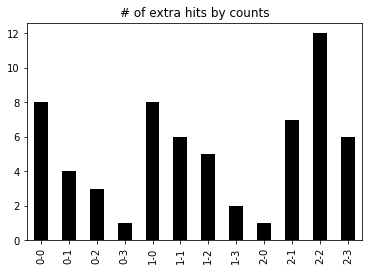

In [30]:
ml_cat['extra_bh']['count'].value_counts().sort_index().plot('bar', color='black', title='# of extra hits by counts')

In [133]:
bal_cat['extra_bh']['pitch_type'].value_counts()

FF    32
FS    12
SL     9
Name: pitch_type, dtype: int64

In [13]:
ml_cat['BBs']['stand'].value_counts()

L    28
R    23
Name: stand, dtype: int64

In [31]:
bal_cat['extra_bh']['count'].value_counts().sort_index().plot('bar', color='black', title='# of extra hits by counts')

NameError: name 'bal_cat' is not defined

In [15]:
ml_cat.head(5)

AttributeError: 'dict' object has no attribute 'head'

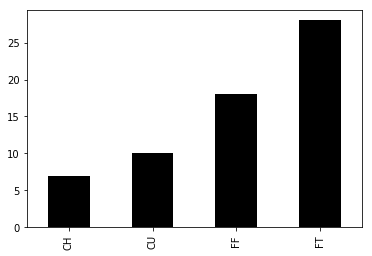

In [32]:
ml_cat['extra_bh']['pitch_type'].value_counts().sort_index().plot('bar', color='black')

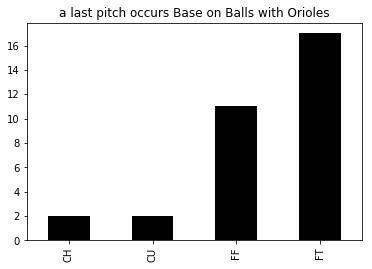

In [33]:
ml_cat['BBs']['pitch_type'].value_counts().sort_index().plot('bar', color='black', title='a last pitch occurs Base on Balls with Orioles')

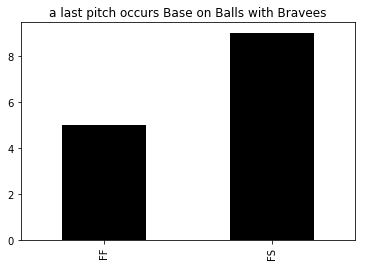

In [144]:
atl_cat['BBs']['pitch_type'].value_counts().sort_index().plot('bar', color='black', title='a last pitch occurs Base on Balls with Bravees')

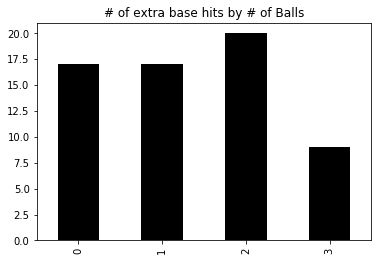

In [35]:
ml_cat['extra_bh']['balls'].value_counts().sort_index().plot('bar', title='# of extra base hits by # of Balls', color='black')

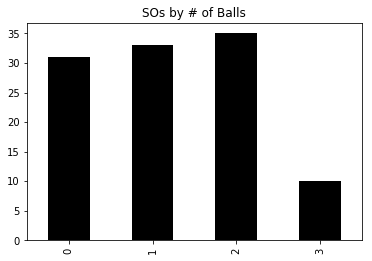

In [34]:
ml_cat['so']['balls'].value_counts().sort_index().plot('bar', title='SOs by # of Balls', color='black')

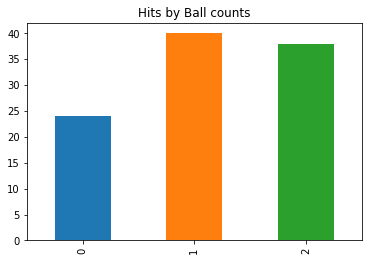

In [20]:
ml_cat['hit']['strikes'].value_counts().sort_index().plot('bar', title='Hits by Ball counts')

In [52]:
ml_by_event = view_as_group(ml_df_, 'events')

In [53]:
hitted_ball_dist = ml2.pitch_type.value_counts()

NameError: name 'ml2' is not defined

In [54]:
all_ball_dist = ml_df['pitch_type'].value_counts()

In [55]:
all_ball_dist - hitted_ball_dist

NameError: name 'hitted_ball_dist' is not defined

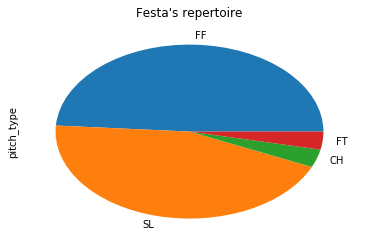

In [57]:
all_ball_dist.plot('pie', title= "Festa's repertoire")

In [58]:
all_ball_dist

FF    44
SL    40
CH     3
FT     3
Name: pitch_type, dtype: int64

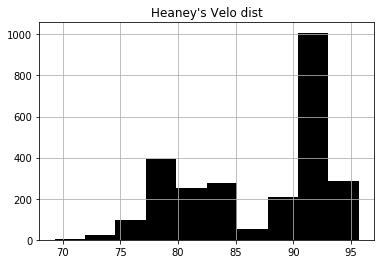

In [22]:
plt.plot()
plt.title("Heaney's Velo dist")
ml_df['release_speed'].hist(color='black')

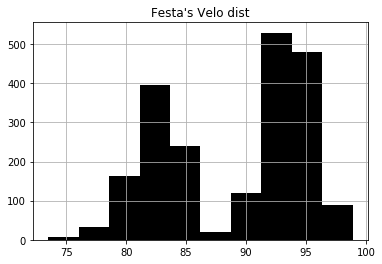

In [100]:
plt.plot()
plt.title("Festa's Velo dist")
bal_df['release_speed'].hist(color='black')

In [64]:
ml2.head(5)

pitch_type  release_speed  iso_value  strikes  balls  \
game_date  at_bat_number                                                        
2018-04-01 1                     SI           87.5        0.0        0      0   
           2                     FF           89.3        0.0        2      2   
           3                     CH           82.3        0.0        1      1   
           4                     CH           82.5        0.0        1      3   
           9                     SI           90.1        0.0        2      2   

                             events  pitch_number stand count  
game_date  at_bat_number                                       
2018-04-01 1                 single             1     L   0-0  
           2              strikeout             6     L   2-2  
           3              field_out             3     L   1-1  
           4              field_out             5     L   1-3  
           9              strikeout             5     R   2-2

In [67]:
pitch_dict = {}
for pitch, df in list(ml2.groupby('pitch_type')):
    pitch_dict[pitch] = df

In [69]:
pitch_dict['CH']

pitch_type  release_speed  iso_value  strikes  balls  \
game_date  at_bat_number                                                        
2018-04-01 3                     CH           82.3        0.0        1      1   
           4                     CH           82.5        0.0        1      3   
           11                    CH           84.2        0.0        2      3   
           14                    CH           81.3        0.0        2      1   
           21                    CH           83.2        0.0        0      0   
           37                    CH           83.2        0.0        1      0   
           45                    CH           82.2        0.0        2      1   
2018-04-07 5                     CH           81.9        0.0        1      2   
           12                    CH           79.7        0.0        1      1   
           27                    CH           83.1        0.0        2      3   
2018-04-13 3                     CH           82.5        0.0        1      0   
           23                    CH           82.4        0.0        1      0   
           25                    CH           83.0        0.0        0      2   
           38                    CH           85.6        0.0        2      3   
           46                    CH           84.4        3.0        1      2   
2018-04-18 35                    CH           84.6        0.0        1      0   
2018-04-23 11                    CH           84.8        1.0        1      1   
           20                    CH           82.6        0.0        0      0   
           25                    CH           85.3        0.0        1      0   
           32                    CH           84.6        3.0        2      1   
2018-04-28 9                     CH           84.2        0.0        2      3   
           27                    CH           84.1        0.0        2      3   
2018-05-04 2                     CH           84.1        0.0        1      2   
           11                    CH           84.6        0.0        2      3   
           17                    CH           83.7        0.0        1      2   
           26                    CH           82.4        0.0        0      1   
           27                    CH           83.9        0.0        0      2   
           32                    CH           84.2        0.0        2      2   
           34                    CH           83.6        0.0        2      2   
           36                    CH           82.1        1.0        2      2   
...                             ...            ...        ...      ...    ...   
2018-08-10 24                    CH           83.3        0.0        1      0   
           26                    CH           83.9        0.0        2      3   
           35                    CH           85.0        0.0        2      3   
2018-08-15 5                     CH           81.8        0.0        1      1   
           11                    CH           82.4        0.0        1      1   
           48                    CH           85.2        0.0        2      3   
2018-08-26 7                     CH           82.3        0.0        1      2   
           15                    CH           83.8        0.0        0      1   
           28                    CH           83.7        0.0        2      1   
           41                    CH           85.4        0.0        2      3   
           42                    CH           82.3        0.0        0      0   
           48                    CH           81.6        0.0        0      0   
2018-08-31 10                    CH           83.0        0.0        1      1   
           18                    CH           84.9        0.0        1      0   
           19                    CH           82.1        0.0        1      2   
           20                    CH           81.3        0.0        1      1   
           26                    CH           85.5      

In [ ]:
ml_focus.apply(lambda x: str(x['game_date']) + '_' + str(x['at_bat_number']))

In [9]:
pit_res['count'] = pit_res['strikes'].map(str) + '-' + pit_res['balls'].map(str)

In [12]:
def focus_events(pit_name, cols=['pitch_type', 'release_speed', 'iso_value', 'strikes', 'balls', 'events']):
    file = 'data/{}.csv'.format(pit_name)
    pit_df = pd.read_csv(file, encoding='utf-8')
    pit_focus = pit_df[cols]
    pit_focus['count'] = pit_df['strikes'].map(str) + '-' + pit_df['balls'].map(str)
    return pit_focus

In [10]:
list(pit_res.groupby('events'))[0][1]['pitch_type'].value_counts()

CH    1
Name: pitch_type, dtype: int64

In [82]:
list(lb_res.groupby('events'))[0][1]['count'].value_counts()

0-0    5
1-3    4
2-2    3
1-0    3
0-1    3
2-3    2
2-1    2
1-1    2
1-2    1
Name: count, dtype: int64

In [80]:
list(lb_res.groupby('events'))[7][1]['pitch_type'].value_counts()

FT    11
CH     6
FC     4
CU     2
Name: pitch_type, dtype: int64

In [81]:
list(lb_res.groupby('events'))[7][1]['count'].value_counts()

2-3    5
1-1    4
0-0    3
1-0    3
2-0    2
2-2    2
1-2    2
2-1    2
Name: count, dtype: int64

In [140]:
pd.read_csv('data/mike_leake.csv').columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'pos2_person_id', 'umpire',
       'sv_id', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pos1_person_id',
       'pos2_person_id.1', 'pos3_person_id', 'pos4_person_id',
       'pos5_person_id', 'pos6_person_id', 'pos7_person_id', 'pos8_person_id',